In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifadataset/submission.csv
/kaggle/input/fifadataset/FIFA_train.csv
/kaggle/input/fifadataset/FIFA_test.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = '../input/fifadataset/'
fifa_train = pd.read_csv(data_path + 'FIFA_train.csv')
fifa_test = pd.read_csv(data_path + 'FIFA_test.csv')

In [4]:
fifa_train.shape, fifa_test.shape # test 데이터에는 value 칼럼이 없음

((8932, 12), (3828, 11))

In [5]:
fifa_train.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [6]:
fifa_test.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


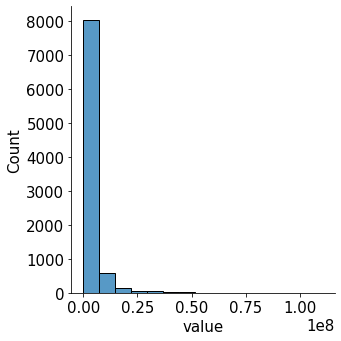

In [7]:
mpl.rc('font', size = 15) # 폰트 크기 15
sns.displot(fifa_train['value'], bins =15); # 분포가 0에 몰려있음(좋은 성능을 기대하기 어려움)

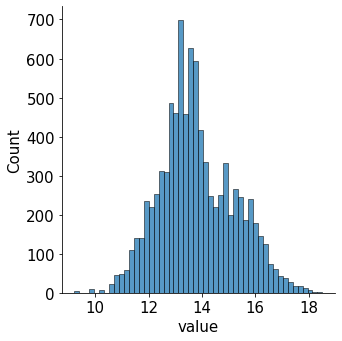

In [8]:
sns.displot(np.log(fifa_train['value'])) # 데이터 분포를 정규 분포에 가깝게 만들기 위해 로그변환을 함

### 타깃값을 value가 아닌 log(value)로 변환해 사용 // 마지막에는 지수 변환 하여 value로 복원

<AxesSubplot:xlabel='position', ylabel='value'>

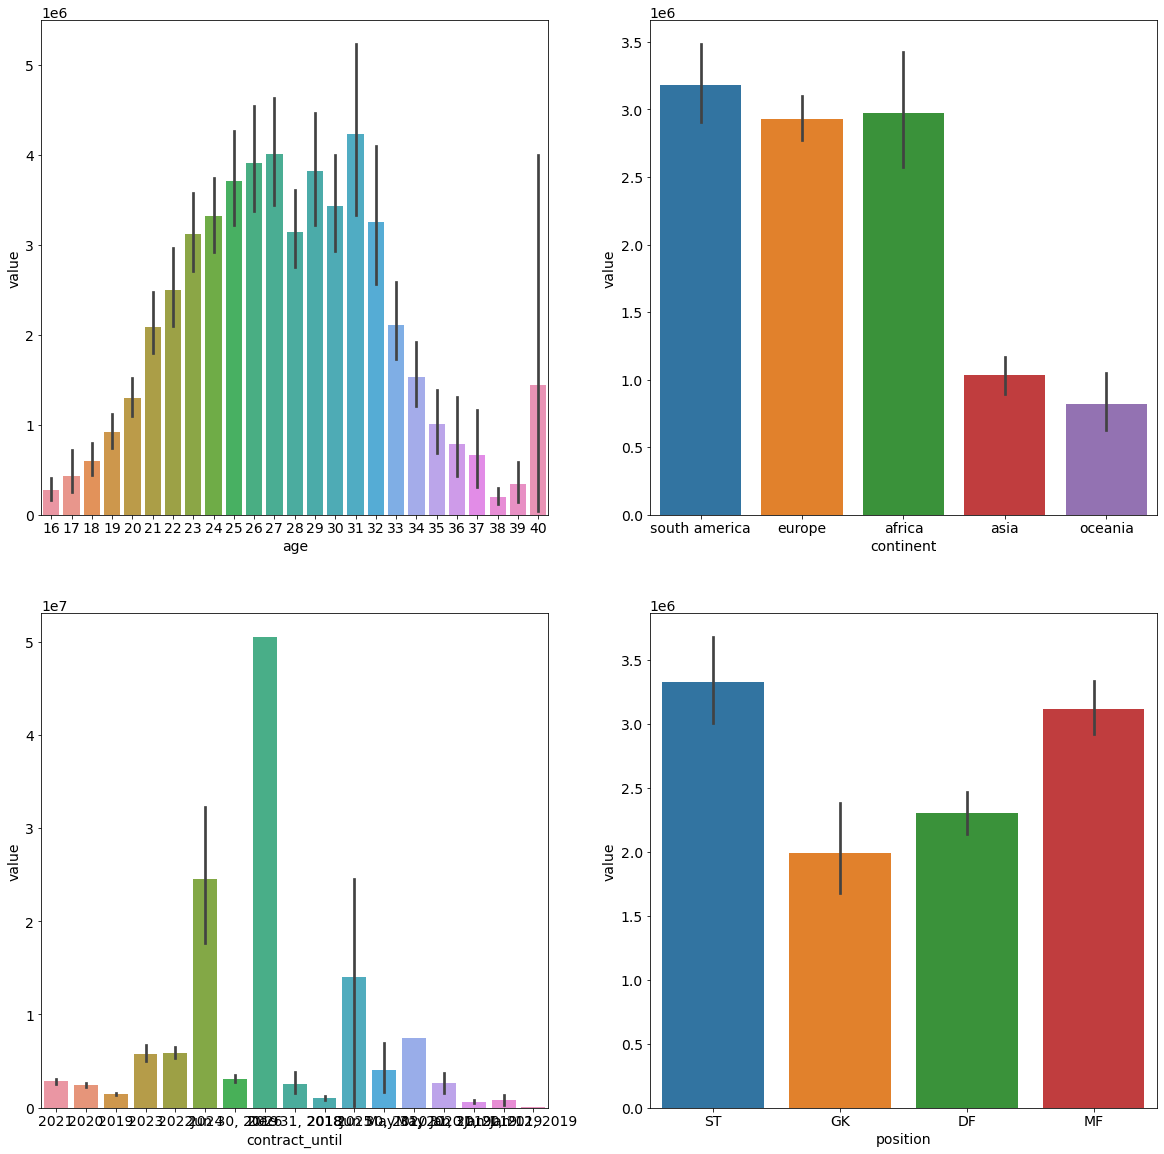

In [9]:
mpl.rc('font', size = 14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 2, ncols=2) # 2행 4열 Figure 생성
# plt.tight_layout()
figure.set_size_inches(20,20)

sns.barplot(x='age', y='value', data=fifa_train, ax = axes[0,0])
sns.barplot(x='continent', y='value', data=fifa_train, ax = axes[0,1])
sns.barplot(x='contract_until', y='value', data=fifa_train, ax = axes[1,0])
sns.barplot(x='position', y='value', data=fifa_train, ax = axes[1,1])

<AxesSubplot:xlabel='stat_potential', ylabel='value'>

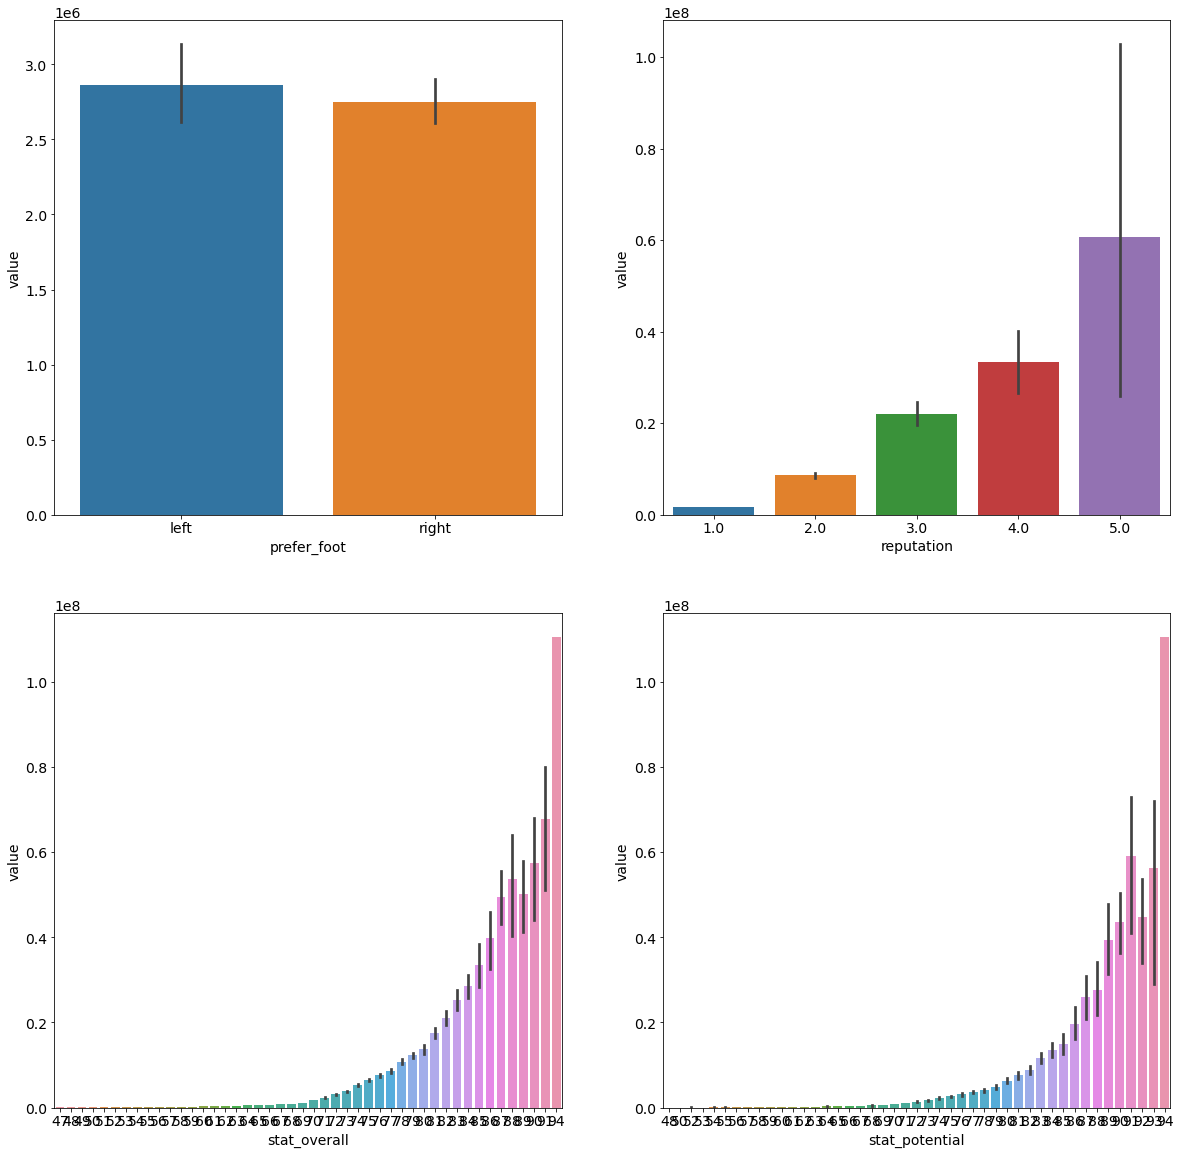

In [10]:
mpl.rc('font', size = 14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 2, ncols=2) # 2행 4열 Figure 생성
# plt.tight_layout()
figure.set_size_inches(20,20)


sns.barplot(x='prefer_foot', y='value', data=fifa_train, ax = axes[0,0])
sns.barplot(x='reputation', y='value', data=fifa_train, ax = axes[0,1])
sns.barplot(x='stat_overall', y='value', data=fifa_train, ax = axes[1,0])
sns.barplot(x='stat_potential', y='value', data=fifa_train, ax = axes[1,1])

<AxesSubplot:xlabel='stat_skill_moves', ylabel='value'>

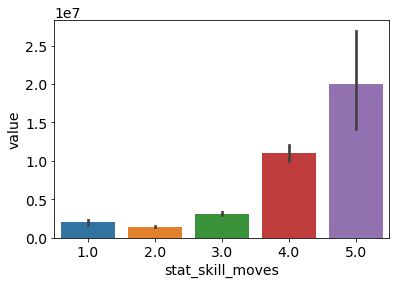

In [11]:
sns.barplot(x='stat_skill_moves', y='value', data=fifa_train)

In [12]:
fifa_train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [13]:
fifa_train[['age', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value']].corr()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


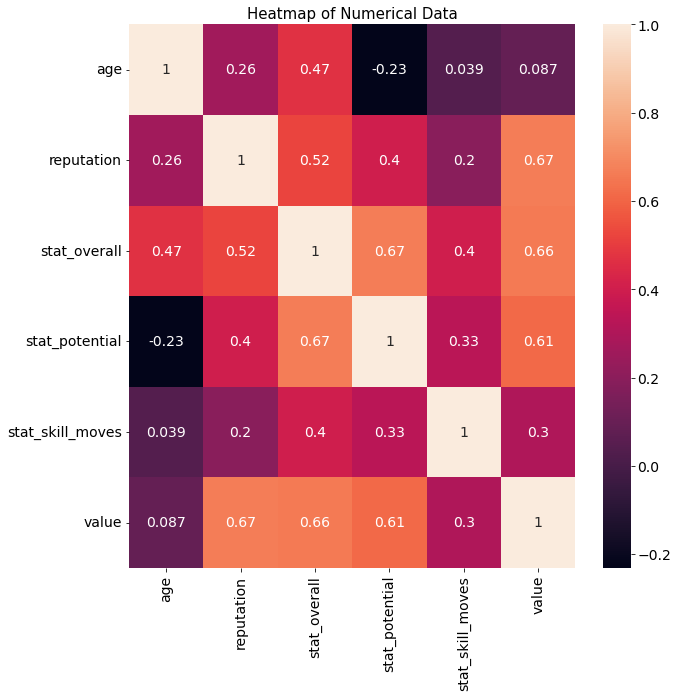

In [14]:
corrMat = fifa_train[['age', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

### age 칼럼 제거, stat_skill_moves 보류 